<a href="https://colab.research.google.com/github/jinoan/Coding_Note/blob/master/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Dirty_Mnist

/content/drive/MyDrive/Dirty_Mnist


In [ ]:
!ls data/dirty_mnist_2nd/
!ls data/preprocessed/train/
!ls data/preprocessed/test/

In [6]:
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import pandas as pd

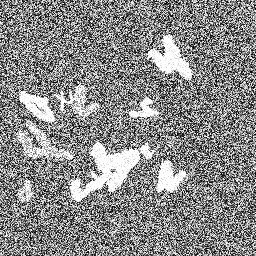

In [9]:
src = image.load_img('./data/dirty_mnist_2nd/00001.png', color_mode='grayscale')
src

In [8]:
src = image.img_to_array(src)
src.shape

(256, 256, 1)

Gaussian Blur 적용

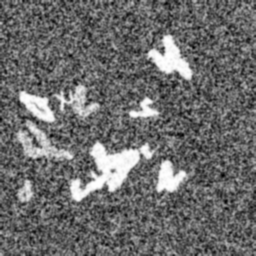

In [10]:
gb = cv2.GaussianBlur(src, (0, 0), 1, 1)
image.array_to_img(np.reshape(gb, src.shape))

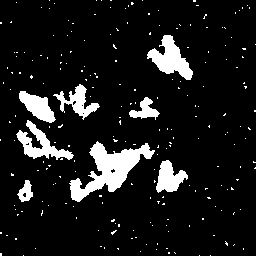

In [11]:
_, gb_bn = cv2.threshold(gb, 175, 255, cv2.THRESH_BINARY)
image.array_to_img(np.reshape(gb_bn, src.shape))

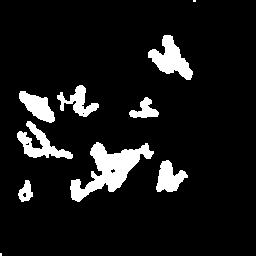

In [12]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(gb_bn, cv2.MORPH_OPEN, kernel)
# opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
# opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
image.array_to_img(np.reshape(opening, src.shape))

Median Blur 적용

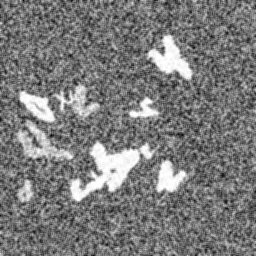

In [ ]:
mb = cv2.blur(src, (3, 3))
image.array_to_img(np.reshape(mb, src.shape))

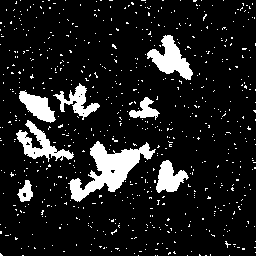

In [ ]:
_, mb_bn = cv2.threshold(mb, 175, 255, cv2.THRESH_BINARY)
image.array_to_img(np.reshape(mb_bn, src.shape))

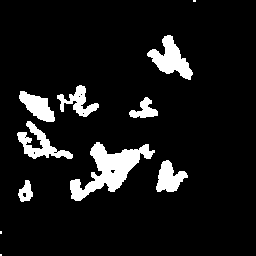

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(mb_bn, cv2.MORPH_OPEN, kernel)
# opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
# opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
image.array_to_img(np.reshape(opening, src.shape))

16 * 16, stride: 1, padding: 8 -> 256 * 256 개의 이미지

rotation 4개 -> 256 * 256 * 4 개의 이미지

(272, 272)


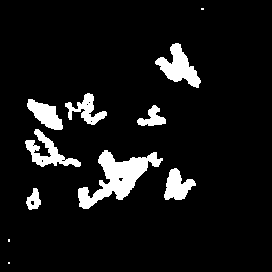

In [ ]:
pad_img = np.pad(opening, (8, 8), 'constant', constant_values=0)
print(pad_img.shape)
image.array_to_img(np.reshape(pad_img, (256+16, 256+16, 1)))

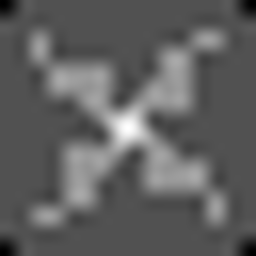

In [ ]:
sum_img = np.zeros((16, 16))
crop_img = pad_img[112:128, 32:48].copy()
sum_img += crop_img + np.rot90(crop_img, k=1) + np.rot90(crop_img, k=2) + np.rot90(crop_img, k=3)
mean_img = sum_img / 4
rst = cv2.resize(mean_img, (256, 256), interpolation=cv2.INTER_CUBIC)
image.array_to_img(np.reshape(rst, (256, 256, 1)))

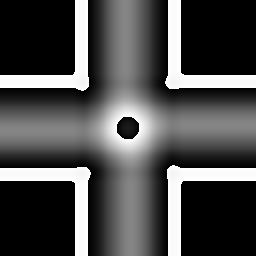

In [ ]:
sum_img = np.zeros((16, 16))
for y in range(256):
    for x in range(256):
        crop_img = pad_img[y:y+16, x:x+16].copy()
        sum_img += crop_img + np.rot90(crop_img, k=1) + np.rot90(crop_img, k=2) + np.rot90(crop_img, k=3)
norm_img = (sum_img - sum_img.min()) / (sum_img.max() - sum_img.min()) * 255
rst = cv2.resize(norm_img, (256, 256), interpolation=cv2.INTER_CUBIC).astype(np.uint8)
image.array_to_img(np.reshape(rst, (256, 256, 1)))

In [ ]:
display(np.max(rst))
display(np.min(rst))

255

0

In [12]:
def preprocess(src):
    src = image.img_to_array(src)
    gb = cv2.GaussianBlur(src, (0, 0), 1, 1)
    _, gb_bn = cv2.threshold(gb, 175, 255, cv2.THRESH_BINARY)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(gb_bn, cv2.MORPH_OPEN, kernel)
    # # pad_img = np.pad(opening, (8, 8), 'constant', constant_values=0)
    # layered_img = np.zeros((16, 16))
    # for b in [16, 32]:
    #     sum_img = np.zeros((b, b))
    #     for y in range(0, 256-b+1):
    #         for x in range(0, 256-b+1):
    #             # crop_img = pad_img[y:y+b, x:x+b].copy()
    #             crop_img = opening[y:y+b, x:x+b].copy()
    #             if crop_img.sum() == 0:
    #                 continue
    #             else:
    #                 sum_img += crop_img
    #     sum_img += np.rot90(sum_img, k=1) + np.rot90(sum_img, k=2) + np.rot90(sum_img, k=3)
    #     layered_img += cv2.resize(sum_img, (32, 32), interpolation=cv2.INTER_CUBIC).astype(np.uint8)[:16, :16]
    # norm_img = (layered_img - layered_img.min()) / (layered_img.max() - layered_img.min()) * 255
    # rst = np.reshape(norm_img, (16, 16, 1))
    rst = np.reshape(opening, (src.shape))
    return rst

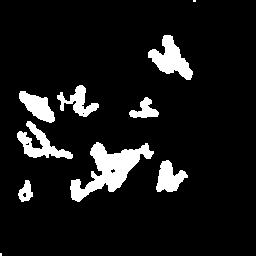

In [13]:
image.array_to_img(preprocess(src))

In [15]:
import os
import time

data_dir = './data/dirty_mnist_2nd/'
save_dir = './data/preprocessed/train/'
image_files = sorted(os.listdir(data_dir))
for image_file in image_files:
    print(image_file, end=' | ')
    load_s = time.time()
    src = image.load_img(data_dir + image_file, color_mode='grayscale')
    proc_s = time.time()
    print(f'loading time: {proc_s-load_s:.3f}', end=' | ')
    rst = preprocess(src)
    save_s = time.time()
    print(f'preprocessing time: {save_s-proc_s:.3f}', end=' | ')
    image.save_img(save_dir + image_file, rst)
    print(f'saving time: {time.time()-save_s:.3f}')

Streaming output truncated to the last 5000 lines.
45000.png | loading time: 0.234 | preprocessing time: 0.002 | saving time: 0.225
45001.png | loading time: 0.209 | preprocessing time: 0.003 | saving time: 0.244
45002.png | loading time: 0.250 | preprocessing time: 0.002 | saving time: 0.221
45003.png | loading time: 0.257 | preprocessing time: 0.002 | saving time: 0.227
45004.png | loading time: 0.214 | preprocessing time: 0.002 | saving time: 0.358
45005.png | loading time: 0.195 | preprocessing time: 0.002 | saving time: 0.256
45006.png | loading time: 0.260 | preprocessing time: 0.002 | saving time: 0.206
45007.png | loading time: 0.258 | preprocessing time: 0.002 | saving time: 0.358
45008.png | loading time: 0.402 | preprocessing time: 0.002 | saving time: 0.239
45009.png | loading time: 0.217 | preprocessing time: 0.002 | saving time: 0.187
45010.png | loading time: 0.396 | preprocessing time: 0.002 | saving time: 0.212
45011.png | loading time: 0.237 | preprocessing time: 0.00

In [16]:
import os

data_dir = './data/test_dirty_mnist_2nd/'
save_dir = './data/preprocessed/test/'
image_files = sorted(os.listdir(data_dir))
for image_file in image_files:
    print(image_file, end=' | ')
    load_s = time.time()
    src = image.load_img(data_dir + image_file, color_mode='grayscale')
    proc_s = time.time()
    print(f'loading time: {proc_s-load_s:.3f}', end=' | ')
    rst = preprocess(src)
    save_s = time.time()
    print(f'preprocessing time: {save_s-proc_s:.3f}', end=' | ')
    image.save_img(save_dir + image_file, rst)
    print(f'saving time: {time.time()-save_s:.3f}')

Streaming output truncated to the last 5000 lines.
50000.png | loading time: 0.207 | preprocessing time: 0.004 | saving time: 0.311
50001.png | loading time: 0.156 | preprocessing time: 0.002 | saving time: 0.192
50002.png | loading time: 0.211 | preprocessing time: 0.002 | saving time: 0.243
50003.png | loading time: 0.136 | preprocessing time: 0.002 | saving time: 0.175
50004.png | loading time: 0.191 | preprocessing time: 0.002 | saving time: 0.205
50005.png | loading time: 0.168 | preprocessing time: 0.002 | saving time: 0.232
50006.png | loading time: 0.189 | preprocessing time: 0.002 | saving time: 0.244
50007.png | loading time: 0.166 | preprocessing time: 0.002 | saving time: 0.328
50008.png | loading time: 0.203 | preprocessing time: 0.003 | saving time: 0.239
50009.png | loading time: 0.302 | preprocessing time: 0.002 | saving time: 0.211
50010.png | loading time: 0.153 | preprocessing time: 0.002 | saving time: 0.276
50011.png | loading time: 0.197 | preprocessing time: 0.00

In [ ]:
import os

data_dir = './data/dirty_mnist_2nd/'
save_dir = './data/preprocessed/train/'
image_files = os.listdir(save_dir)
len(image_files)

50000